In [3]:
#10.1

#对于无向图，关联矩阵中，顶点只要在边上，则dij=1；其它dij=0
import numpy as np
gunalianjuzheng = np.array([
    [1,1,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0],
    [0,0,1,1,1,1,0,0,0],
    [0,1,0,1,0,0,1,1,0],
    [0,0,0,0,1,0,1,0,1],
    [0,0,0,0,0,1,0,1,1]
])
linjiejuzheng = np.array([
    [0,e1,0,e2,0,0],
    [e1,0,e3,0,0,0],
    [0,e3,0,e4,e5,e6],
    [e2,0,e4,0,e7,e8],
    [0,0,e5,e7,0,e9],
    [0,0,e6,e8,e9,0]
])

最短路径为： [1, 3, 2, 6, 5] ;最短距离为： 11


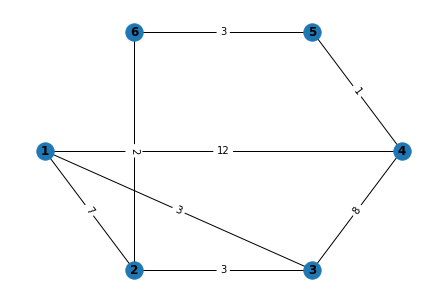

In [11]:
#10.2

#用轮子networkx，使用dijkstra算法
import numpy as np
import pylab as plt
import networkx as nx
#输入各个点之间的参数
List=[(1,2,7),(1,3,3),(1,4,12),(2,3,3),(2,6,2),(3,4,8),(4,5,1),(5,6,3)]
G=nx.Graph()      #创建无向图
G.add_nodes_from(range(1,6))    #增加顶点
G.add_weighted_edges_from(List)        #从列表中添加多条边
p=nx.dijkstra_path(G,source=1,target=5,weight='weight')     #求最短路径
d=nx.dijkstra_path_length(G,source=1,target=5,weight='weight')     #求最短距离
print("最短路径为：",p,";最短距离为：",d)     #打印出答案
#画图
G.add_nodes_from(range(1,6))        #添加顶点集合
G.add_weighted_edges_from(List)
pos=nx.shell_layout(G)       #将顶点分布在同心圆上
w=nx.get_edge_attributes(G,'weight')
nx.draw(G,pos,with_labels=True,font_weight='bold',font_size=12)    #画图（基本条件）
nx.draw_networkx_edge_labels(G,pos,edge_labels=w)     #在图上标记权重
plt.show()

最小生成树为： {(1, 3): 3, (2, 6): 2, (2, 3): 3, (4, 5): 1, (5, 6): 3}
最小生成树长度为： 12


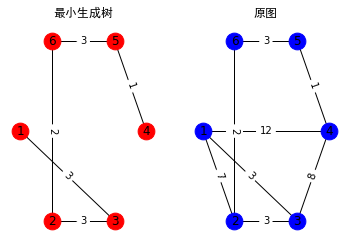

In [15]:
#10.3

#用轮子networkx，最小生成树
import networkx as nx
import  pylab as plt
L=[(1,2,7),(1,3,3),(1,4,12),(2,3,3),(2,6,2),(3,4,8),(4,5,1),(5,6,3)] #邻接矩阵
b=nx.Graph()      #构造无向图
b.add_nodes_from(range(1,6))       #添加顶点集合
b.add_weighted_edges_from(L)      #添加权重边
T=nx.minimum_spanning_tree(b)       #返回可迭代对象，默认使用kruskal算法
w=nx.get_edge_attributes(T,'weight')      #提取字典数据
q=nx.get_edge_attributes(b,'weight')      #对原图相对点提取字典数据
TL = sum(w.values())     #计算最小生成树的长度，字典的值为边权
print("最小生成树为：",w)
print("最小生成树长度为：",TL)
pos=nx.shell_layout(b)       #使图像按照顶点在同心圆上分布
plt.rc('font',family="SimHei")   #使图像可以显示中文
#画出最小生成树图像
plt.subplot(121)
nx.draw(T,pos,node_size=280,with_labels=True,node_color='r')
nx.draw_networkx_edge_labels(T,pos,edge_labels=w)
plt.title("最小生成树")
#画出原图图像进行对比
plt.subplot(122)
nx.draw(b,pos,node_size=280,with_labels=True,node_color='b')
nx.draw_networkx_edge_labels(b,pos,edge_labels=q)
plt.title("原赋权无向图")
plt.show()

[[ 0.  2.  6.  7.  8. 11.]
 [ 2.  0.  4.  5.  6.  9.]
 [ 6.  4.  0.  1.  2.  5.]
 [ 7.  5.  1.  0.  1.  4.]
 [ 8.  6.  2.  1.  0.  3.]
 [11.  9.  5.  4.  3.  0.]]
总里程m= [2350. 1870. 1550. 1590. 1710. 2490.] 
最小总里程mm= 1550.0 
建设小学的位置为： [3]


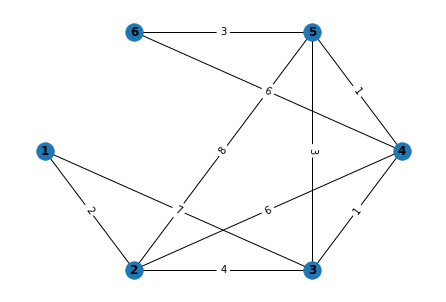

In [17]:
#10.4

#分别求每一个村庄作为小学点时相应的总路程
import numpy as np
import networkx as nx
import pylab as plt
#导入6个村子相互之间的道路距离数据
List=[(1,2,2),(1,3,7),(2,3,4),(2,4,6),
      (2,5,8),(3,4,1),(3,5,3),(4,5,1),(4,6,6),(5,6,3)]
G=nx.Graph()      #创建无向图
G.add_nodes_from(range(1,7))     #添加顶点集合
G.add_weighted_edges_from(List)         #从列表中添加多条边
c=dict(nx.shortest_path_length(G,weight='weight'))       #创建最小距离函数，并返回字典类型
d=np.zeros((6,6))     #创建零矩阵
#计算每个地点作为小学点时学生上学最方便
for i in range(1,7):
      for j in range(1,7):d[i-1,j-1]=c[i][j]
print(d)#距离矩阵
q=np.array([100,80,60,40,70,90])       #输入每个小学的人口数据
m=d@q         #计算行走路程，这里使用矩阵算法
mm=m.min()      #求路程最小值
ind=np.where(m==mm)[0]+1       #python下标从零开始，np.where返回值为元组
print("总里程m=",m,'\n最小总里程mm=',mm,"\n建设小学的位置为：",ind)      #输出
pos=nx.shell_layout(G)       #使画图的分布点在同心圆上
w=nx.get_edge_attributes(G,'weight')      #在图上体现各边比重
nx.draw(G,pos,with_labels=True,font_weight='bold',font_size=12)
nx.draw_networkx_edge_labels(G,pos,edge_labels=w)
plt.show()

最小生成树的长度为： 14218.8536
最短路径为： ['L', 'K', 'X', 'Y', 'H1', 'V1', 'F2', 'J2', 'M2', 'Z2', 'A3', 'I3', 'J3', 'R3']
最短距离为： 2795.4679


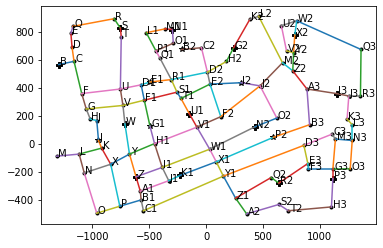

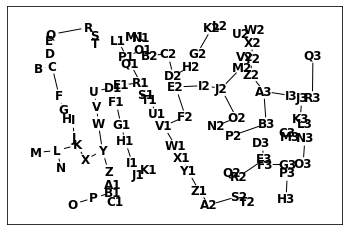

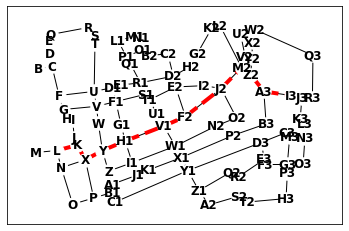

In [2]:
#10.5

import numpy as np
import pandas as pd
import networkx as nx
import pylab as plt

a=pd.read_excel('ti6_7.xlsx')
b=a.values
s = list(b[:,0])      #提取顶点字符串
x=b[:,1]
y=b[:,2]  #提取x,y坐标
num=b[:,3].astype(float)  #提取顶点类别
ad=b[:,4:].astype(str)    #提取邻接顶点
in1=np.where(num==1)[0]  #提取第1类点的编号
in2=np.where(num==2)[0]  #提取第2类点的编号
in3=np.where(np.isnan(num))[0]

plt.plot(x[in1],y[in1],'Pk')
for i in range(len(in1)):
    plt.text(x[in1[i]]+10,y[in1[i]],s[in1[i]])
plt.plot(x[in2],y[in2],'*k')
for i in range(len(in2)):
    plt.text(x[in2[i]]+10,y[in2[i]],s[in2[i]])
plt.plot(x[in3],y[in3],'.k')
for i in range(len(in3)):
    plt.text(x[in3[i]]+10,y[in3[i]],s[in3[i]])
c=np.zeros((95,95))
for i in range(95):
    tt=list(ad[i])  #转换为列表
    tt=[t for t in tt if t!='nan']  #删除nan
    if len(tt)==0: continue
    for k in range(len(tt)):
        j=s.index(tt[k])
        c[i,j]=np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)
i,j=np.nonzero(c)  #提取所有边的端点编号
for k in range(len(i)):
    plt.plot([x[i[k]],x[j[k]]],[y[i[k]],y[j[k]]])

G=nx.Graph()         #构造无向图
G.add_nodes_from(s)  #加入顶点集
eds=[]               #边集初始化
for k in range(len(i)):
    eds.append([s[i[k]],s[j[k]],c[i[k],j[k]]])
G.add_weighted_edges_from(eds)  #加入赋权边集
T=nx.minimum_spanning_tree(G)  #利用Kruskal算法构造最小生成树
w=nx.get_edge_attributes(T,'weight')  #提取边权的字典数据
LT=sum(w.values())  #求最小生成树的长度
print('最小生成树的长度为：', round(LT,4))
pos=dict(zip(s,b[:,[1,2]]))  #顶点坐标的字典数据
plt.figure()
nx.draw_networkx(T,pos,node_size=180,font_weight='bold',
                 with_labels=True,node_color='w')

p=nx.shortest_path(G,'L','R3',weight='weight')  #求最短路径
d=nx.shortest_path_length(G,'L','R3',weight='weight')
print('最短路径为：',p); print('最短距离为：',round(d,4))
plt.figure()
nx.draw_networkx(G,pos,node_size=180,font_weight='bold',
                 with_labels=True,node_color='w')
path_edges=list(zip(p,p[1:]))
nx.draw_networkx_edges(G,pos,edgelist=path_edges,
            edge_color='r',style='dashed',width=4)
plt.show()

In [32]:
#10.6
'''
参考知乎链接：https://zhuanlan.zhihu.com/p/482996991
经过分析，感觉做法有点奇怪，但是书中没有介绍过min_weight_matching的用法，所以无从考证
查阅资料，多是用非线性规划的方式解决这一问题
线性规划：https://max.book118.com/html/2017/0901/131186136.shtm
'''
import numpy as np
import networkx as nx
from networkx.algorithms.matching import min_weight_matching      #导入数据模块
a=np.array([[150,150,150,150,150,60,60,60,60,60],
            [150,150,150,150,150,60,60,60,60,60],
            [150,150,150,150,150,60,60,60,60,60],
            [120,120,120,120,120,160,160,160,160,160],
            [120,120,120,120,120,160,160,160,160,160],
            [120,120,120,120,120,160,160,160,160,160],
            [80,80,80,80,80,40,40,40,40,40],
            [80,80,80,80,80,40,40,40,40,40],
            [80,80,80,80,80,40,40,40,40,40],
            [80,80,80,80,80,40,40,40,40,40]])      #导入路程数据
b=np.zeros((20,20))
b[0:10,10:]=a
print(b)
G=nx.Graph(b)
s0=min_weight_matching(G)      #返回值为（煤矿场，发电厂）的集合
s=[sorted(w) for w in s0]
print(s)
L1=[x[0] for x in s];L1=np.array(L1)+1      #煤矿场编号
L2=[x[1] for x in s];L2=np.array(L2)-9      #发电厂编号
c=a[L1-1,L2-1]      #提取对应的路程
d=c.sum()         #计算总的路程
for i in range(10):      #将编号转换一下
    if L1[i]<=5:L1[i]=1
    else:L1[i]=2
    if L2[i]<4:L2[i]=1
    elif L2[i]<7:L2[i]=2
    else:L2[i]=3
#输出所需的值
print("煤矿分配对应关系为：\n煤矿场编号：",L1)
print("发电厂编号：",L2)
print("总的路程为：",d)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 150. 150. 150. 150.
  150.  60.  60.  60.  60.  60.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 150. 150. 150. 150.
  150.  60.  60.  60.  60.  60.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 150. 150. 150. 150.
  150.  60.  60.  60.  60.  60.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 120. 120. 120. 120.
  120. 160. 160. 160. 160. 160.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 120. 120. 120. 120.
  120. 160. 160. 160. 160. 160.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 120. 120. 120. 120.
  120. 160. 160. 160. 160. 160.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  80.  80.  80.  80.
   80.  40.  40.  40.  40.  40.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  80.  80.  80.  80.
   80.  40.  40.  40.  40.  40.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  80.  80.  80.  80.
   80.  40.  40.  40.  40.  40.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  80

[[1]
 [2]
 [2]
 [3]
 [3]
 [4]]
[[0.025      0.025      0.875      0.025      0.025      0.025     ]
 [0.45       0.025      0.45       0.025      0.025      0.025     ]
 [0.025      0.025      0.025      0.025      0.45       0.45      ]
 [0.30833333 0.30833333 0.30833333 0.025      0.025      0.025     ]
 [0.30833333 0.30833333 0.025      0.30833333 0.025      0.025     ]
 [0.2375     0.2375     0.025      0.2375     0.2375     0.025     ]]
最大特征值为： [1.]
归一化特征向量为：
 [0.1876 0.1316 0.2695 0.1026 0.1692 0.1395]


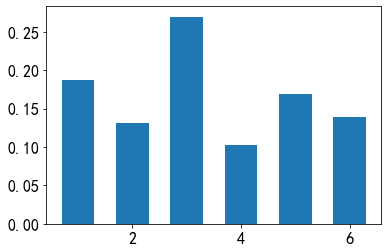

In [27]:
#10.7

#（1）
#利用竞赛图，排名：1，3，2，4，5，6
#在这里给出排名的规则是：赢的数量最多的那支队伍获胜，如果赢的数量相同，则看他们之间的比赛，谁赢，谁的排名就靠前）

#（2）pageRank方法
import numpy as np
from scipy.sparse.linalg import eigs
import pylab as plt
a = np.array([[0,1,0,1,1,1],
              [0,0,0,1,1,1],
              [1,1,0,1,0,0],
              [0,0,0,0,1,1],
              [0,0,1,0,0,1],
              [0,0,1,0,0,0]])
w = a.T
r = np.sum(w,axis=1,keepdims=True)#图中每只球队输球有向图输入的链接数目
print(r)
n = w.shape[0]#总的球队数目
d=0.85
P=(1-d)/n+d*w/r#利用pageRank公式
print(P)
#pagerank值是转移概率矩阵A的转置矩阵的最大特征值所对应的归一化特征向量
w,v=eigs(P.T,1)  #求最大特征值及对应的特征向量
v=v/sum(v)
v=v.real.flatten()
print('最大特征值为：', w.real)
print('归一化特征向量为：\n', np.round(v,4))
plt.bar(range(1,n+1),v, width=0.6); plt.show()#可以看到3号球队最好

网络直径为： 3 
平均路径长度为： 1.5333333333333334
各顶点的聚类系数：
(顶点v1:1.0000); (顶点v2:0.5000); (顶点v3:0.6667); (顶点v4:1.0000); (顶点v5:0.3333); (顶点v6:0.0000); 
整个网络的聚类系数为：0.5833


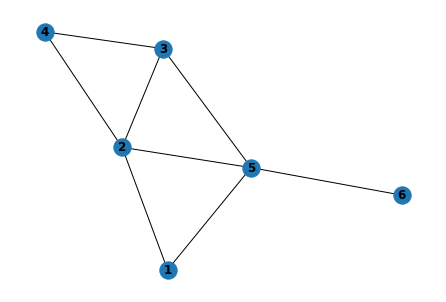

In [20]:
#10.8

import numpy as np
import networkx as nx
import pylab as plt
#导入无权网络的数据
l=[(1,2),(1,5),(2,4),(2,3),(2,5),(3,4),(3,5),(5,6)]
G=nx.Graph()    #创建无向图
G.add_nodes_from(range(1,7))    #添加顶点集合
G.add_edges_from(l)        #从列表中添加边集
D=nx.diameter(G)       #求网络直径
LH=nx.average_shortest_path_length(G)     #求平均路径长度
Ci=nx.clustering(G)        #求各类顶点的聚类系数
C=nx.average_clustering(G)       #求整个网络的聚类系数
print("网络直径为：",D,"\n平均路径长度为：",LH)
print("各顶点的聚类系数：")
for index,value in enumerate(Ci.values()):
    print("(顶点v{:d}:{:.4f});".format(index+1,value),end=' ')
print("\n整个网络的聚类系数为：{:.4f}".format(C))
#对简单无权网络图的各项参数进行设置，并画出该无权网络图
pos=nx.spring_layout(G)
w=nx.get_edge_attributes(G,'weight')
nx.draw(G,pos,with_labels=True,font_weight='bold',font_size=12)
nx.draw_networkx_edge_labels(G,pos,edge_labels=w)
plt.show()

